# Analysis

In [664]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler


sns.set(rc={'figure.figsize':(12,8)})

In [665]:
class CustomeOneHotEncoder:
    def __init__(self,drop=False):
        self.columns_ = None
        self.drop_ = drop
        self.encoder = OneHotEncoder()
        
    def fit(self,data,columns):
        self.columns_ = columns
        self.encoder.fit(data[self.columns_])
    
    def fit_transform(self,data,columns):
        self.fit(data,columns)
        return self.transform(data)
    
    def transform(self,data):
        feature_array = self.encoder.transform(data[self.columns_]).toarray()
        feature_label = self.encoder.categories_
        new_feature_label = []
        for x,y in zip(self.columns_,feature_label):
            new_feature_label.append([x+'_'+str(z) for z in y])

        final_feature_label= np.concatenate([x for x in new_feature_label])
        encoded_df = pd.DataFrame(feature_array,columns=final_feature_label,index = data.index)

        if self.drop_:
            cols_to_drop = [x[0] for x in new_feature_label]
            encoded_df = encoded_df.drop(cols_to_drop,axis=1)
        data = data.drop(self.columns_,axis=1)   
        #return encoded_df
        return pd.concat([data,encoded_df],axis=1)
    


# Linear Regression

In [666]:
pd.options.display.max_rows=None

In [667]:
data = pd.read_csv('train_1.csv')

data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Total_Members,Title,Cabin_Codes,Age_Group,Multiply
0,1,0,3,male,22.0,1,0,7.2500,S,1,Mr,No_Cabin,2,66.0
1,2,1,1,female,38.0,1,0,71.2833,C,1,Mr,C,3,38.0
2,3,1,3,female,26.0,0,0,7.9250,S,0,Miss,No_Cabin,2,78.0
3,4,1,1,female,35.0,1,0,53.1000,S,1,Mr,C,2,35.0
4,5,0,3,male,35.0,0,0,8.0500,S,0,Mr,No_Cabin,2,105.0


In [668]:

dataset = data.copy()


## Train And test Dataset

In [669]:
y = dataset['Survived']

x = dataset.drop(['Survived','PassengerId'],axis=1)



In [670]:
x.columns.values

array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Total_Members', 'Title', 'Cabin_Codes', 'Age_Group', 'Multiply'],
      dtype=object)

In [671]:
encoder = CustomeOneHotEncoder(drop=True)
x = encoder.fit_transform(x,columns=['Pclass','Sex','Embarked','Age_Group','Cabin_Codes','Title'])


In [672]:
scaler = StandardScaler()
x[['Age','Fare','Multiply','SibSp','Parch','Total_Members']] = scaler.fit_transform(x[['Age','Fare','Multiply','SibSp','Parch','Total_Members']])
x.head()

,Age,SibSp,Parch,Fare,Total_Members,Multiply,Pclass_2,Pclass_3,Sex_male,Embarked_Q,...,Title_Jonkheer,Title_Jr,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Ms,Title_Rev
0,-0.527806,0.432793,-0.473674,-0.502445,0.059160,0.116230,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.673375,0.432793,-0.473674,0.786845,0.059160,-0.780077,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.227511,-0.474545,-0.473674,-0.488854,-0.560975,0.500361,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.448153,0.432793,-0.473674,0.420730,0.059160,-0.876110,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.448153,-0.474545,-0.473674,-0.486337,-0.560975,1.364657,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [673]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [674]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=32,shuffle=True)

x_train.shape,x_test.shape


print('Test Shape : {} , Train Shape {}'.format(x_test.shape,x_train.shape))

Test Shape : (179, 36) , Train Shape (712, 36)


# Modelling

In [675]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics

### Statsmodels Logitics Regression

In [677]:
res = sm.OLS(y_train,sm.add_constant(x_train)).fit()
#res = res

def get_accuracy(data_x,data_y,model):
    l = []
    for fo in model.predict(data_x).round(2):
        if fo >0.5:
            l.append(1)
        else:
            l.append(0)
    return accuracy_score(data_y,l)

print('Train Accuracy:', get_accuracy(sm.add_constant(x_train),y_train,res))
print('Test Accuracy:', get_accuracy(sm.add_constant(x_test),y_test,res))
print(res.summary())

Train Accuracy: 0.8469101123595506
Test Accuracy: 0.8268156424581006
                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     18.34
Date:                Sat, 29 Aug 2020   Prob (F-statistic):           4.87e-73
Time:                        01:53:09   Log-Likelihood:                -268.71
No. Observations:                 712   AIC:                             605.4
Df Residuals:                     678   BIC:                             760.7
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [678]:

res = LogisticRegression()
res = res.fit(x_train,y_train)
#print('Train Accuracy:', accuracy_score(y_train,res.predict(x_train)))
#print('Test Accuracy:', accuracy_score(y_test,res.predict(x_test)))

#print('Train Accuracy:' ,metrics.accuracy_score(y_train, res.predict(x_train)))
#print('Test Accuracy:' ,metrics.accuracy_score(y_test, res.predict(x_test)))


In [679]:
def get_accuracy(data_x,data_y,model):
    l = []
    for fo in model.predict(data_x).round(2):
        if fo >0.5:
            l.append(1)
        else:
            l.append(0)
    return accuracy_score(data_y,l)


In [680]:
print('Train Accuracy:', get_accuracy(x_train,y_train,res))
print('Test Accuracy:', get_accuracy(x_test,y_test,res))

Train Accuracy: 0.8455056179775281
Test Accuracy: 0.8100558659217877


## Create Submission

In [681]:
test_data = pd.read_csv('test_1.csv')
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Codes,Age_Group,Title,Total_Members,Multiply
0,892,3,male,34.5,0,0,7.8292,Q,No_Cabin,2,Mr,0,103.5
1,893,3,female,47.0,1,0,7.0000,S,No_Cabin,3,Mr,1,141.0
2,894,2,male,62.0,0,0,9.6875,Q,No_Cabin,4,Mr,0,124.0
3,895,3,male,27.0,0,0,8.6625,S,No_Cabin,2,Mr,0,81.0
4,896,3,female,22.0,1,1,12.2875,S,No_Cabin,2,Mr,2,66.0


In [682]:
test_data = test_data.sample(frac=1)

In [683]:
passenger_id = test_data.PassengerId

In [684]:
#tes_col_to_include = col_to_include[1:]

In [685]:
#test_data = test_data[tes_col_to_include]

In [686]:
test_data = encoder.transform(test_data)
test_data.head()

,PassengerId,Age,SibSp,Parch,Fare,Total_Members,Multiply,Pclass_2,Pclass_3,Sex_male,...,Title_Jonkheer,Title_Jr,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Ms,Title_Rev
109,1001,18.5,0,0,13.0000,0,37.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
191,1083,40.0,0,0,26.0000,0,40.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
344,1236,24.0,1,1,14.5000,2,72.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
333,1225,19.0,1,1,15.7417,2,57.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
85,977,24.0,1,0,14.4542,1,72.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [687]:
test_data[['Age','Fare','Multiply','SibSp','Parch','Total_Members']] = scaler.fit_transform(test_data[['Age','Fare','Multiply','SibSp','Parch','Total_Members']])
test_data = test_data.iloc[:,1:]
test_data.head()

,Age,SibSp,Parch,Fare,Total_Members,Multiply,Pclass_2,Pclass_3,Sex_male,Embarked_Q,...,Title_Jonkheer,Title_Jr,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Ms,Title_Rev
109,-0.829881,-0.499470,-0.400248,-0.404388,-0.553443,-0.890525,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
191,0.827668,-0.499470,-0.400248,-0.171372,-0.553443,-0.776934,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
344,-0.405857,0.616992,0.619896,-0.377501,0.764728,0.434699,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
333,-0.791333,0.616992,0.619896,-0.355245,0.764728,-0.133254,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
85,-0.405857,0.616992,-0.400248,-0.378322,0.105643,0.434699,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [689]:
#res = DecisionTreeClassifier(max_depth=4,criterion="entropy").fit(x,y)
x = x.sample(frac=1)
y = y.sample(frac=1)
res = LogisticRegression()
res = model.fit(x,y)
#print('Train Accuracy:', accuracy_score(y_train,res.predict(x_train)))
#print('Test Accuracy:', accuracy_score(y_test,res.predict(x_test)))
print('Train Accuracy:' ,get_accuracy(x,y,res))

Train Accuracy: 0.6195286195286195


In [690]:
#pred_values = res.predict(test_data)
l = []
for x in res.predict(test_data).round(2):
    if x >0.5:
        l.append(1)
    else:
        l.append(0)

In [691]:
result = pd.DataFrame({
                        'PassengerId': passenger_id,
                        'Survived': l
                        })
result = result.sort_values(by='PassengerId')

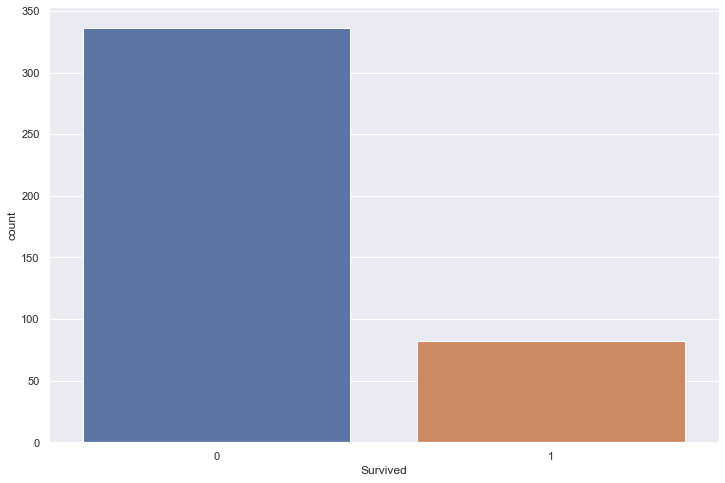

In [692]:
sns.countplot(result['Survived'])

In [693]:
result.shape

(418, 2)

In [694]:
result.to_csv('Prediction_12.csv',index=False)